In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
weight = pd.read_csv('weight-height.csv')
weight
weight.drop_duplicates(inplace=True)
weight_copy = weight.copy()
weight_copy


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [5]:
weight = weight[['Height','Weight']]
weight_copy

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [6]:
weight['weight_kg']=weight['Weight']/2.205
weight['Height_m']=weight['Height']*2.54
# weight_org = weight[['weight_kg','height_m']]
weight

,Height,Weight,weight_kg,Height_m
0,73.847017,241.893563,109.702296,187.571423
1,68.781904,162.310473,73.610192,174.706036
2,74.110105,212.740856,96.481114,188.239668
3,71.730978,220.042470,99.792504,182.196685
4,69.881796,206.349801,93.582676,177.499761
...,...,...,...,...
9995,66.172652,136.777454,62.030591,168.078536
9996,67.067155,170.867906,77.491114,170.350573
9997,63.867992,128.475319,58.265451,162.224700
9998,69.034243,163.852461,74.309506,175.346978


In [7]:
weight.drop(['Weight','Height'],axis=1,inplace=True)
weight

,weight_kg,Height_m
0,109.702296,187.571423
1,73.610192,174.706036
2,96.481114,188.239668
3,99.792504,182.196685
4,93.582676,177.499761
...,...,...
9995,62.030591,168.078536
9996,77.491114,170.350573
9997,58.265451,162.224700
9998,74.309506,175.346978


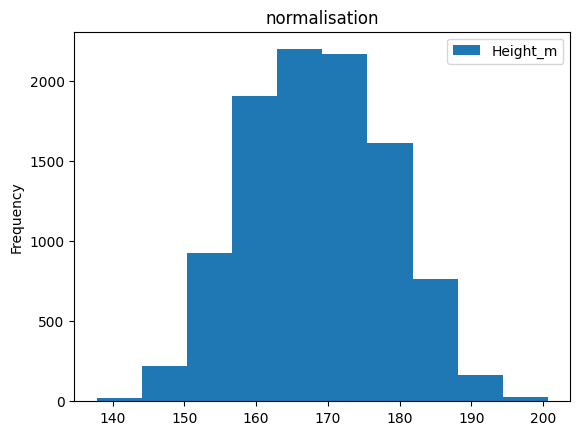

In [8]:
#assumtion 1 : check nomalisation
weight.plot(kind='hist',x='weight_kg')
plt.title("normalisation")
plt.show()

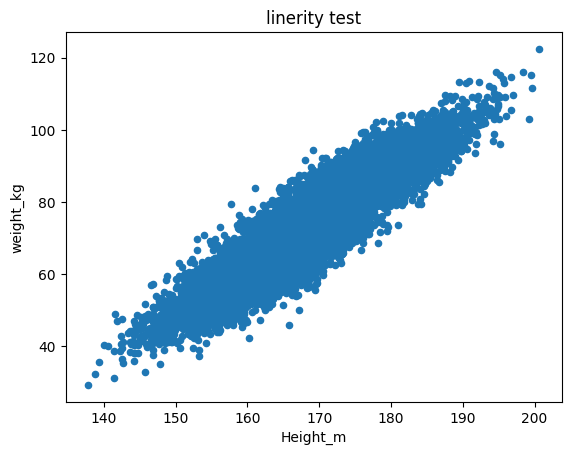

In [9]:
#linerity test
weight.plot(kind="scatter",x='Height_m',y='weight_kg')
plt.title("linerity test")
plt.show()

In [10]:
#multicollinearity
weight.corr()

,weight_kg,Height_m
weight_kg,1.000000,0.924756
Height_m,0.924756,1.000000



*   assumption 4 : no auto regression
*   assumption 5 : homoscedasticity test
*   assumption 6 : Zero residual mean test


In [11]:
#model building
from sklearn.linear_model import LinearRegression
X=weight[['weight_kg']]
y=weight['Height_m']

In [12]:
#model training
linear_model = LinearRegression()
linear_model.fit(X,y)

LinearRegression()

In [13]:
linear_model.coef_

array([0.62062922])

In [14]:
linear_model.intercept_

np.float64(123.13387264001614)

In [15]:
#7.model testing
test_data =pd.DataFrame([80,90,100])

y_pred=linear_model.predict(test_data)
y_pred

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([172.78421024, 178.99050245, 185.19679465])

In [16]:
y_pred=linear_model.predict(X)
error = y - y_pred
error

,Height_m
0,-3.646900
1,5.887528
2,5.226797
3,-2.871331
4,-3.714254
...,...
9995,6.446666
9996,-0.876549
9997,2.929586
9998,6.094454


In [17]:
error.mean()

np.float64(-7.764811016386375e-15)

**lets check assumption**

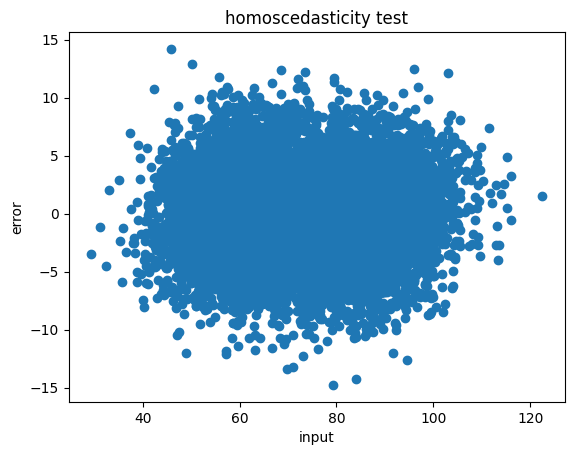

In [18]:
#assumption 5 : homoscedasticity test

plt.scatter(x=X,y=error)
plt.xlabel('input')
plt.ylabel('error')
plt.title('homoscedasticity test')
plt.show()

**assumption 6 : Zero residual mean test**

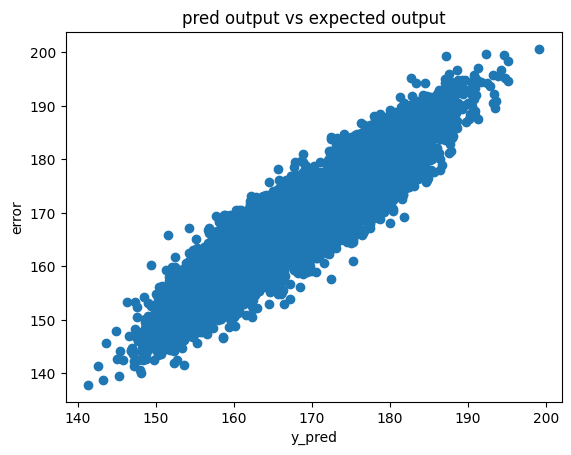

In [19]:
plt.scatter(x=y_pred,y=y)
plt.xlabel('y_pred')
plt.ylabel('error')
plt.title('pred output vs expected output')
plt.show()

**model deployment**

In [20]:
from pickle import dump
dump(linear_model,open('weght_height_model.pkl','wb'))

In [21]:
# load the model
from pickle import load

In [22]:
loaded_weight_height_model = load(open('weght_height_model.pkl','rb'))
loaded_weight_height_model.predict(X)

array([191.21832319, 168.81850845, 183.01287094, ..., 159.29511386,
       169.25252357, 155.12206037])

**logistic**

**import weight-height.csv**

In [23]:
import pandas as pd

In [24]:
weight_height = pd.read_csv('weight-height.csv')
weight_height.isnull().sum()
weight_height.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [25]:
# weight_height['Height']=weight_height['Height']*2.54
# weight_height['Weight']=weight_height['Weight']/2.205
# weight_height

weight_height['weight_kg']=weight_height['Weight']/2.205
weight_height['Height_m']=weight_height['Height']*2.54
weight_height

,Gender,Height,Weight,weight_kg,Height_m
0,Male,73.847017,241.893563,109.702296,187.571423
1,Male,68.781904,162.310473,73.610192,174.706036
2,Male,74.110105,212.740856,96.481114,188.239668
3,Male,71.730978,220.042470,99.792504,182.196685
4,Male,69.881796,206.349801,93.582676,177.499761
...,...,...,...,...,...
9995,Female,66.172652,136.777454,62.030591,168.078536
9996,Female,67.067155,170.867906,77.491114,170.350573
9997,Female,63.867992,128.475319,58.265451,162.224700
9998,Female,69.034243,163.852461,74.309506,175.346978


In [26]:
weight_height.drop(['Weight','Height'],axis=1,inplace=True)
weight_height


,Gender,weight_kg,Height_m
0,Male,109.702296,187.571423
1,Male,73.610192,174.706036
2,Male,96.481114,188.239668
3,Male,99.792504,182.196685
4,Male,93.582676,177.499761
...,...,...,...
9995,Female,62.030591,168.078536
9996,Female,77.491114,170.350573
9997,Female,58.265451,162.224700
9998,Female,74.309506,175.346978


In [27]:
weight_height['Gender'].replace({'Male':1,'Female':0},inplace=True)
weight_height

/tmp/ipython-input-1994817682.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  weight_height['Gender'].replace({'Male':1,'Female':0},inplace=True)
/tmp/ipython-input-1994817682.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weight_height['Gender'].replace({'Male':1,'Female':0},inplace=True)


,Gender,weight_kg,Height_m
0,1,109.702296,187.571423
1,1,73.610192,174.706036
2,1,96.481114,188.239668
3,1,99.792504,182.196685
4,1,93.582676,177.499761
...,...,...,...
9995,0,62.030591,168.078536
9996,0,77.491114,170.350573
9997,0,58.265451,162.224700
9998,0,74.309506,175.346978


In [28]:
X=weight_height.drop('Gender',axis=1)
y=weight_height['Gender']

In [29]:
#import logistic reg
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [30]:
logestic_reg=LogisticRegression()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
logestic_reg.fit(X_train,y_train)

LogisticRegression()

In [31]:
prediction = logestic_reg.predict(X_train)
prediction
# weight_height['prediction']= pd.DataFrame(prediction)
# # weight_height

array([0, 1, 1, ..., 1, 1, 0])

In [32]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_train,prediction)

0.91825

In [33]:
# 1️⃣ Import required libraries
from sklearn.datasets import load_iris          # real dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


iris = load_iris()


X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


print(y_pred)


accuracy = accuracy_score(y_test, y_pred)
print("KNN Classification Accuracy:", accuracy)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
KNN Classification Accuracy: 1.0


In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Create model
nb_model = GaussianNB()

# Train model
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Accuracy
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


In [ ]:
svm_model = SVC(kernel='linear')  # linear kernel
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
